# Matplotlib and tidy data

### Handy hints 

* In general, we are using plotting libraries that return objects encapsulating the plot. You can check the type of these returned objects with `type()`. Jupyter's tools for exploring objects and methods will also be useful: the `?` and `??` operators, and tab autocompletion.

## Setup 

In [2]:
import pandas as pd
import numpy as np

In [3]:
# This causes Jupyter to display any matplotlib plots directly in the notebook
# It also works for seaborn, since seaborn uses matplotlib to render plots
# There is an alterative `%matplotlib notebook` magic for interactivity, which we won't use today
# - we will use other libraries for interactive plots
%matplotlib inline

In [4]:
# pyplot (as plt) is the module we'll primarily use to instantiate matplotlib plot objects
# We wouldn't usually need to import matplotlib itself, but we'll use it to explore the library
import matplotlib
from matplotlib import pyplot as plt

### Toy data 

Let's create a toy dataset to use for illustration and problem-posing purposes. It's very small, so you we can easily see what's going on. In most cases we'll ask you to do exercises using the more complex housing data.

In [5]:
from io import StringIO

data_string = """name	number	engine_type	colour	wheels	top_speed_mph	weight_tons
Thomas	1	Tank	Blue	6	40	52
Edward	2	Tender	Blue	14	70	41
Henry	3	Tender	Green	18	90	72.2
Gordon	4	Tender	Blue	18	100	91.35
James	5	Tender	Red	14	70	46
Percy	6	Tank	Green	4	40	22.85
Toby	7	Tank	Brown	6	20	27
Emily	12	Tender	Green	8	85	45
Rosie	37	Tank	Purple	6	65	37
Hiro	51	Tender	Black	20	55	76.8"""

trains = pd.read_table(StringIO(data_string))
trains['size'] = pd.cut(trains['weight_tons'], 3, labels=['Small','Medium','Big'])

trains

,name,number,engine_type,colour,wheels,top_speed_mph,weight_tons,size
0,Thomas,1,Tank,Blue,6,40,52.00,Medium
1,Edward,2,Tender,Blue,14,70,41.00,Small
2,Henry,3,Tender,Green,18,90,72.20,Big
3,Gordon,4,Tender,Blue,18,100,91.35,Big
4,James,5,Tender,Red,14,70,46.00,Medium
5,Percy,6,Tank,Green,4,40,22.85,Small
6,Toby,7,Tank,Brown,6,20,27.00,Small
7,Emily,12,Tender,Green,8,85,45.00,Small
8,Rosie,37,Tank,Purple,6,65,37.00,Small
9,Hiro,51,Tender,Black,20,55,76.80,Big


## Matplotlib intro: the pyplot interface 

Matplotlib comes with an interface of convenience functions, available under `pyplot`. It was originally designed to mimic MATLAB's plotting interface.

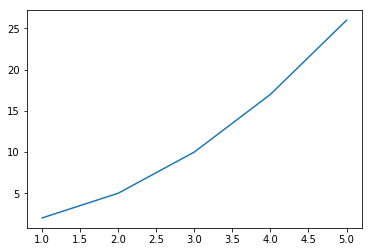

In [12]:
x = [1,2,3,4,5]
y = [2,5,10,17,26]

plt.plot(x,y)

`pyplot` has a concept of the "current" axes and figure, so you don't generally have to tell functions which plot to act on - they will automatically operate on the most-recent, currently open plot. This is often convenient, but sometimes too restrictive. 

In Jupyter, each input cell will create a new plot, and every command in the cell will operate on that plot:

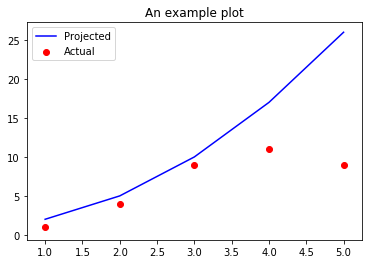

In [6]:
y2 = [1,4,9,11,9]

plt.plot(x, y, c='blue', label='Projected')
plt.scatter(x, y2, c='red', label='Actual')
plt.legend()
plt.title("An example plot")

# Save the plot to a file
plt.savefig("example_matplotlib.png")

We saved the plot to a PNG file. If we don't specify the format to `savefig()`, it is deduced from the filename. One of Matplotlib's strengths is that it supports a wide range of plotting backends, including many image formats.

It's very common to use Numpy arrays and Pandas Series with Matplotlib.

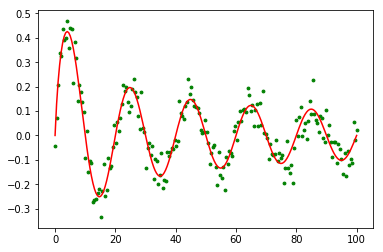

In [7]:
x = np.linspace(0, 100, 200)  # 200 points from 0 to 100
wavelength = 20
y = np.sin(2*np.pi*x/wavelength) * 1/np.sqrt(x+1)
y_noisy = y + 0.05*np.random.randn(len(y))

plt.plot(x, y, c='red')
plt.scatter(x, y_noisy, c='green', s=8)  # s sets size

**Exercise:** Using the toy `trains` dataset, create a scatter plot of `top_speed_mph` against   `weight_tons`.

For those new to Pandas, you can get vector-like Pandas Series of values with `trains['top_speed_mph']` and `trains['wheels']`.

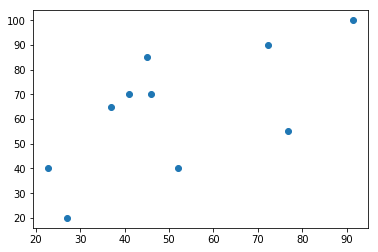

In [8]:
plt.scatter(x=trains['weight_tons'], y=trains['top_speed_mph'])

There are many plot types. You can find a gallery at https://matplotlib.org/gallery.html.

Let's try a bar plot showing the average speed of tender engines vs tank engines. 

engine_type
Tank      41.250000
Tender    78.333333
Name: top_speed_mph, dtype: float64
engine_type
Tank      18.427787
Tender    16.329932
Name: top_speed_mph, dtype: float64


<Container object of 2 artists>

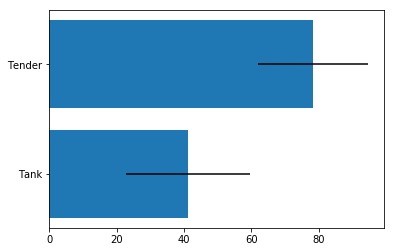

In [9]:
average_top_speeds = trains.groupby('engine_type')['top_speed_mph'].aggregate(np.mean)
speed_stderrs = trains.groupby('engine_type')['top_speed_mph'].aggregate(np.std)
print(average_top_speeds)
print(speed_stderrs)

# this is a horizontal bar plot; plt.bar would give a vertical plot
plt.barh(y=[0,1], width=average_top_speeds, xerr=speed_stderrs, 
         tick_label=average_top_speeds.index)

Notice that Matplotlib bar plots expect us to input the length of the bars directly, so we needed to calculate these averages using Pandas.

A [boxplot](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html) is actually a little easier in terms of summary statistics: we provide a list of arrays/series/lists, each one of which is the set of datapoints for one box. Here's some data transformed with Pandas to use:

In [22]:
data = [series for (groupname, series) in list(trains.groupby('engine_type')['top_speed_mph'])]
label_names = [groupname for (groupname, series) in list(trains.groupby('engine_type')['top_speed_mph'])]

**Exercise:** Create a boxplot using the above data and labels.

/Users/clare/anaconda3/envs/aspp-visualisation-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


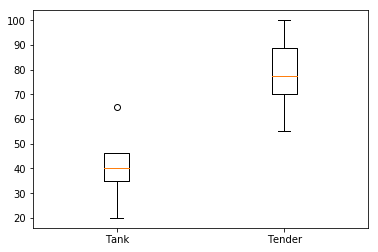

In [24]:
g = plt.boxplot(x=data, labels=label_names)

## Interlude: tidy data 

Before doing this section, we'll have a discussion in the workshop.

Here are two "wide" datasets to follow along with the demo, or to try to solve yourself:

In [30]:
sales_wide1 = pd.read_csv('housing-data-wide1.csv', parse_dates=['date1','date2'])
sales_wide1

,property_id,bedrooms,date1,date2
0,5631500400,2,2015-02-25,NaT
1,6021501535,3,2014-07-25,2014-12-23
2,7129300520,3,2014-10-13,NaT


In [31]:
sales = sales_wide1.melt(id_vars=['property_id','bedrooms'], value_name='date')
sales

,property_id,bedrooms,variable,date
0,5631500400,2,date1,2015-02-25
1,6021501535,3,date1,2014-07-25
2,7129300520,3,date1,2014-10-13
3,5631500400,2,date2,NaT
4,6021501535,3,date2,2014-12-23
5,7129300520,3,date2,NaT


In [32]:
sales.drop("variable", axis=1, inplace=True)
sales.dropna(how='any', axis=0, inplace=True)  # or e.g. sales[~sales['date'].isnull()]
sales

,property_id,bedrooms,date
0,5631500400,2,2015-02-25
1,6021501535,3,2014-07-25
2,7129300520,3,2014-10-13
4,6021501535,3,2014-12-23


In [34]:
# show that pivot can do the inverse of melt
sales = sales_wide1.melt(id_vars=['property_id', 'bedrooms'], value_name='date')
sales.pivot(index='property_id', columns='variable', values='date')

variable,date1,date2
property_id,,
5631500400,2015-02-25,NaT
6021501535,2014-07-25,2014-12-23
7129300520,2014-10-13,NaT


In [35]:
sales_wide2 = pd.read_csv('housing-data-wide2.csv', parse_dates=['date1','date2'])
sales_wide2

,property_id,bedrooms,date1,price1,date2,price2
0,5631500400,2,2015-02-25,180000.0,NaT,NaN
1,6021501535,3,2014-07-25,430000.0,2014-12-23,700000.0
2,7129300520,3,2014-10-13,221900.0,NaT,NaN


In [36]:
# A first step for the second problem: set up a MultiIndex for the columns
price_date_table = sales_wide2[['date1', 'date2', 'price1', 'price2']]
price_date_table.index = sales_wide2['property_id']
price_date_table.columns = pd.MultiIndex.from_product([['date','price'],['sale1','sale2']], 
                                                        names=('variable', 'salenum'))
price_date_table

variable          date                price          
salenum          sale1      sale2     sale1     sale2
property_id                                          
5631500400  2015-02-25        NaT  180000.0       NaN
6021501535  2014-07-25 2014-12-23  430000.0  700000.0
7129300520  2014-10-13        NaT  221900.0       NaN

In [41]:
price_date_longform = price_date_table.stack()
price_date_longform

variable                  date     price
property_id salenum                     
5631500400  sale1   2015-02-25  180000.0
6021501535  sale1   2014-07-25  430000.0
            sale2   2014-12-23  700000.0
7129300520  sale1   2014-10-13  221900.0

In [42]:
price_date_longform.reset_index(inplace=True)
price_date_longform.drop("salenum", axis=1, inplace=True)
price_date_longform

variable,property_id,date,price
0,5631500400,2015-02-25,180000.0
1,6021501535,2014-07-25,430000.0
2,6021501535,2014-12-23,700000.0
3,7129300520,2014-10-13,221900.0


In [45]:
# Merge long-form table with property variables ('bedrooms'), if we want one flat table
pd.merge(sales_wide2.iloc[:,:-4], # all but last 4 columns of original dataframe
         price_date_longform, 
         how='right', left_on='property_id', right_on='property_id')

,property_id,bedrooms,date,price
0,5631500400,2,2015-02-25,180000.0
1,6021501535,3,2014-07-25,430000.0
2,6021501535,3,2014-12-23,700000.0
3,7129300520,3,2014-10-13,221900.0


The dataset below is a spoiler! Before looking at it, make sure you're done with the "tidy data" exercise.

## Housing data 

Let's read in the data we will use for the rest of the workshop. This is house sales data from Seattle in 2014-2015. To simplify things, we'll read in only the fields we'll use, but you can read in the rest of the fields to play later if you want more variables.

First, a quick look at the raw data:

In [6]:
!head -n 3 housing-data-10000.csv

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
1446800660,2015-03-16,276500.0,4,1.75,1400,6650,1.5,0,0,4,6,1400,0,1942,0,98168,47.4888,-122.33200000000001
1453601502,2015-02-26,303697.0,4,2.0,2520,7334,1.0,0,0,3,7,1600,920,1955,0,98125,47.7263,-122.291


This data is pretty tidy already. We have one sale per row, one column per variable, and just one table of observations.

In [7]:
sales = pd.read_csv("housing-data-10000.csv", 
                    usecols=['id','date','price','zipcode','lat','long',
                             'waterfront','view','grade','sqft_living','sqft_lot'],
                    parse_dates=['date'], 
                    dtype={'zipcode': 'category',
                           'waterfront': 'bool'})

In [8]:
sales.head()

,id,date,price,sqft_living,sqft_lot,waterfront,view,grade,zipcode,lat,long
0,1446800660,2015-03-16,276500.0,1400,6650,False,0,6,98168,47.4888,-122.332
1,1453601502,2015-02-26,303697.0,2520,7334,False,0,7,98125,47.7263,-122.291
2,9523103990,2014-12-08,611000.0,1850,5000,False,0,7,98103,47.6727,-122.351
3,7308600040,2014-07-23,769995.0,3360,12080,False,0,9,98011,47.7757,-122.173
4,1562200240,2014-09-18,550000.0,2160,15360,False,0,8,98007,47.6232,-122.138


In [8]:
sales.dtypes

id                      int64
date           datetime64[ns]
price                 float64
sqft_living             int64
sqft_lot                int64
waterfront               bool
view                    int64
grade                   int64
zipcode              category
lat                   float64
long                  float64
count                   int64
dtype: object

Note that as well as specifying that the `date` field should be parsed as a date, we specified that certain variables are categorical (as opposed to integers). Some plotting commands understand pandas DataFrames and will treat categorical variables differently to numerical variables.

## Matplotlib  

### Figures and Axes 

Under the hood, Matplotlib is an object-oriented library. I recommend using the object-oriented interface directly rather than the pyplot interface, for full control over your plots. 

Libraries built on Matplotlib can also return Matplotlib objects - we'll see this later with Seaborn. Understanding a bit of the structure of Matplotlib objects will let you tweak your Seaborn plots.

Here's how to make the plot we made above, using method calls instead of the shortcut `plt.scatter`:

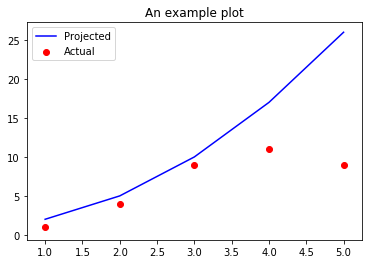

In [27]:
# we could be even more explicit here and instead use
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
fig, ax = plt.subplots()

x = [1,2,3,4,5]
y = [2,5,10,17,26]
y2 = [1,4,9,11,9]

ax.plot(x, y, c='blue', label='Projected')
ax.scatter(x, y2, c='red', label='Actual')
ax.legend()
ax.set_title("An example plot")

fig.savefig("example_matplotlib.png")

Let's look at the objects we created in the first step:

In [28]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

Here, `fig` is a Matplotlib `Figure` class instance representing the figure we've drawn. The `Axes` are a property of the figure. So, we still have access to our plot, and can display and modify it.

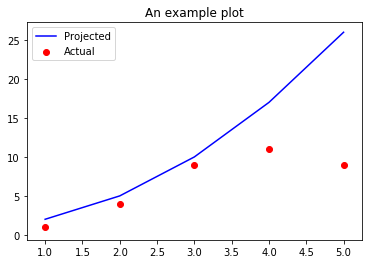

In [29]:
fig

In [30]:
fig.axes

In [31]:
the_same_axes_as_before = fig.axes[0]

the_same_axes_as_before.annotate("where it all went wrong", 
                                 xy=(3,10), xytext=(1,12),
                                 arrowprops={'width':2})

Text(1,12,'where it all went wrong')

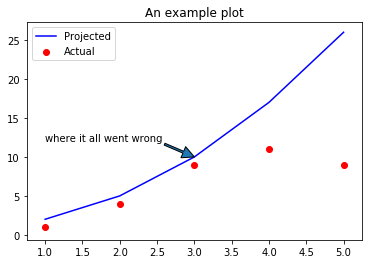

In [35]:
fig

`ax` is a Matplotlib `Axes` class instance. It represents an area of a figure with coordinates, on which we can plot. You can see that most of our plotting methods are actually methods of the `Axes` class, e.g. `Axes.scatter()`, and they add plot elements to the axes they're called on. `plt.scatter()` is just a wrapper around `Axes.scatter()`. Try running `??plt.scatter` to see the source code of this wrapper.

If you've been working in the pyplot interface and need to retrieve the currently-active Figure or Axes objects, you can use the `plt.gcf()` (get current figure) and `plt.gca()` (get current axes) functions.

**Exercise:** Create a scatter plot of house sales, using the latitude as the y-coordinate, and the longitude as the x-coordinate. Try to use object-oriented method calls for everything except creating the initial object(s). Give your figure a title, like "House sales in Seattle". You may want to try adding some transparency to your points with the `alpha` parameter.

Text(0.5,1,'House sales in Seattle')

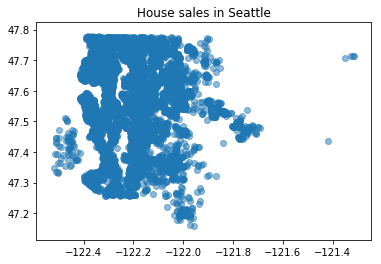

In [19]:
fig, ax = plt.subplots()

ax.scatter(sales['long'], sales['lat'], alpha=0.5)
ax.set_title("House sales in Seattle")

### Subplots and more Axes 

A figure can have more than one set of axes. This is how we create subplots.

`Figure.add_subplot(nrows, ncols, n)` will create a grid of `nrows x ncols` subplots, and return the nth axes object from the list. `plt.subplot()` is a wrapper around this method.

`plt.subplots(nrows, ncols)` will create a new Figure object and then add a grid of subplots, and return a tuple of the Figure and the array of all Axes. It's a commonly-used utility function. You will often see it used even when we only want a single plot on our figure, as we did above.

Extra arguments to `plt.subplots()` are passed through to the `plt.figure()` call, so we can specify e.g. the figure size this way.

Text(0.5,0.98,'Really useful engines')

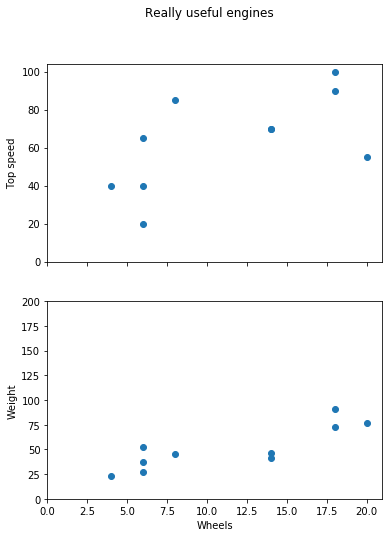

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6,8))

axes[0].scatter(x=trains['wheels'], y=trains['top_speed_mph'])
axes[0].set_ylabel("Top speed")

axes[1].scatter(x=trains['wheels'], y=trains['weight_tons'])
axes[1].set_ylabel("Weight")
axes[1].set_xlabel("Wheels")

# This sets the minimum of the x-axis to zero, and leaves the maximum to auto
# It affects both subplots since we set sharex=True
axes[0].set_xlim(0,None)

# This sets the y-axis, but each call only affects one subplot
# Set max weight to 200 just to illustrate
axes[0].set_ylim(0,None)
axes[1].set_ylim(0,200)

# Add a title to the entire figure, not one of the axes
fig.suptitle("Really useful engines")

NB: the `matplotlib.gridspec.GridSpec` class can be used to make more complicated layouts of subplots. We won't use this today.

We can add arbitrary axes to our figure, which is useful for making an inset plot:

Text(0.5,1,'Weight distribution')

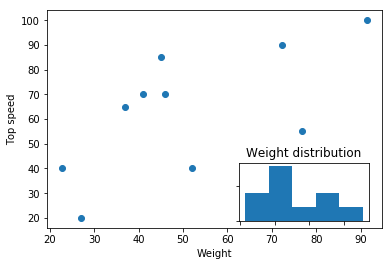

In [21]:
fig, ax = plt.subplots()

ax.scatter(x=trains['weight_tons'], y=trains['top_speed_mph'])
ax.set_ylabel("Top speed")
ax.set_xlabel("Weight")

# the first argument should be a list or tuple (left, bottom, width, height)
# coordinates are fractions of figure width and height
inset_axes = fig.add_axes([0.57, 0.15, 0.3, 0.2])
inset_axes.set_xticklabels([])  # no labels on inset axes
inset_axes.set_yticklabels([]) 
inset_axes.hist(trains['weight_tons'], bins=5)
inset_axes.set_title("Weight distribution")

**Exercise:** Create two subplots, one above the other. In the top plot, plot a boxplot of house price across the `waterfront` variable (i.e. `price` on y axis, `waterfront` on x axis). In the bottom plot, plot a barplot of the *count* of the number of waterfront and non-waterfront sales.

The positions of the box plots along the x-axis will default to `[1,2]` (this is the default `positions` argument), so you can set the `x` parameter in the bar plot to match if you want your plots to line up nicely.

Use `?plt.bar()` and `?plt.boxplot()` to easily see documentation on the plotting functions, but try to use the Axes methods to actually plot them.

<details closed style="border: 1px solid darkgreen; background: #f0fff0; padding: 5px; margin: 5px">
<summary>Hint: making a box plot</summary>
<p>
You need to pass the `boxplot()` function's `x` parameter a list of two vectors: one vector of numbers for non-waterfront prices, and one for waterfront prices. You could make these with
</p><p>
```
nonwaterfront_prices = sales.loc[~sales['waterfront'], 'price']
waterfront_prices = sales.loc[sales['waterfront'], 'price']
price_lists = [nonwaterfront_prices, waterfront_prices]
```
</p><p>
Here `sales['waterfront']` is already a boolean variable, so `sales['waterfront']` is equivalent to `sales['waterfront']==True` and `~sales['waterfront']` is equivalent to `sales['waterfront']==False`.
</p><p>
More efficient is to use `groupby()`:
</p><p>
```
price_groups = list(sales.groupby('waterfront')['price'])
price_lists = [series for (label, series) in price_groups]
```
</p>

```

```

</details>

<details closed style="border: 1px solid darkgreen; background: #f0fff0; padding: 5px; margin: 5px">
<summary>Hint: summing counts for the bar plot</summary>

You can sum counts with Pandas `Series.value_counts()`.

Specifically, if 
</p><p>
```counts = sales['waterfront'].value_counts()```
</p><p>
then the heights of the bars shoud be set to `counts`, and the `tick_label` parameter can be set to `counts.index`.
</p><p>
It's also possible to use `groupby()` and then `count()` or `aggregate(np.sum)`.
</p>
</details>

/Users/clare/anaconda3/envs/aspp-visualisation-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Price')

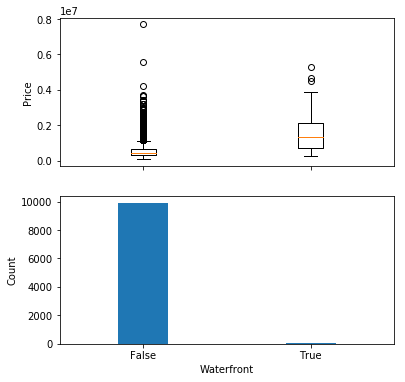

In [29]:
fix, axes = plt.subplots(2, 1, sharex=True, figsize=(6,6))

price_groups = list(sales.groupby('waterfront')['price'])
# we're throwing away waterfront value labels as we don't need them for the top plot
# we could use e.g. `labels, price_lists = zip(*price_series)` if we needed them
price_lists = [series for (label, series) in price_groups]

counts = sales['waterfront'].value_counts()

axes[0].boxplot(x=price_lists)
axes[1].bar(x=[1,2], height=counts, tick_label=counts.index,
            width=0.3)  # width optional - a bit nicer-looking to match the bar plot
axes[1].set_xlabel("Waterfront")
axes[1].set_ylabel("Count")
axes[0].set_ylabel("Price")

### Styles

Matplotlib now has style sheets and context managers, which allow you to change the parameters for a plot. Context managers have an effect within the scope of a `with` block. For instance:

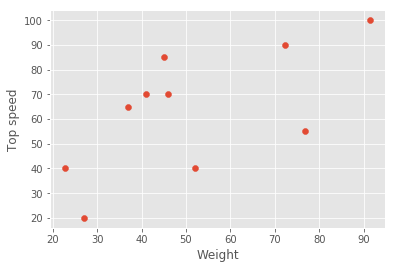

In [39]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots()
    ax.scatter(x=trains['weight_tons'], y=trains['top_speed_mph'])
    ax.set_xlabel('Weight')
    ax.set_ylabel('Top speed')

A few example style sheets are:

- default : the Matplotlib 2 default
- ggplot : like R's ggplot
- seaborn : like Seaborn
- classic : what Matplotlib looked like once apon a time

Styles can be set permanently, instead of in a context, using `plt.style.use()`. 

Stylesheets are essentially sets of parameters, and you can define your own. You can find out more about the `style` package [here](https://matplotlib.org/users/style_sheets.html). 


### Colours 

Matplotlib has a good range of colours. We'll look a bit at colour functionality, and there are some more convenience functions when we get up to Seaborn.

Colours can be specified by name (e.g. "red", "blue", "palegoldenrod"....) - a list of named colours is [here](https://matplotlib.org/examples/color/named_colors.html)

Colours can be specified by RGB or RGBA value, as hex (e.g. "#ffffa0" or "#ffffa088") or as tuples, e.g. (1,1,0.6) or (1,1,0.6,0.5).

_Colormaps_ map continuous variables to colours. This is done by normalising the variable into the [0,1] range, then mapping this to a defined range of colours. The `plt.cm` module contains built-in colourmaps, and these can also be retrieved with `plt.get_cmap(name)`.

There's some Matplotlib documentation on [Choosing Colormaps](https://matplotlib.org/users/colormaps.html), which illustrates available built-in colormaps.

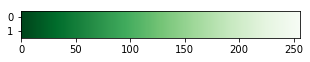

In [14]:
# Show the plt.cm.Greens_r colormap. Replace with other colormaps to see them. 
# Greens_r is a sequential colormap of greens of differing intensities.
# _r means it is reversed (dark to light)

colourmap = plt.get_cmap("Greens_r")

fix, ax = plt.subplots(figsize=(5,0.5))

# Make an image which is two rows of points with a gradient from 0 to 1
gradient = np.linspace(0, 1, 256)
image = np.vstack([gradient, gradient])

ax.imshow(image, aspect='auto', cmap=colourmap)


To colour a scatter plot with a continuous variable, we can just set the `c` parameter to the colour variable, and optionally, select a colormap using the `cmap` parameter. 

Text(0,0.5,'Top speed')

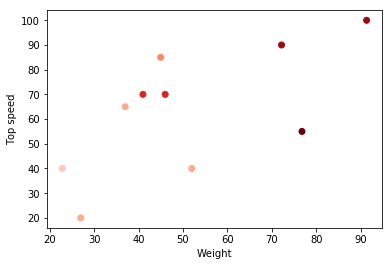

In [40]:
fig, ax = plt.subplots()

ax.scatter(x=trains['weight_tons'], y=trains['top_speed_mph'], 
           c=trains['wheels'],
           cmap='Reds',
           vmin=0)   # Set the lightest colour to map to zero. Default is the smallest value.
ax.set_xlabel('Weight')
ax.set_ylabel('Top speed')


We can also add a colour bar to show the variable mapping.

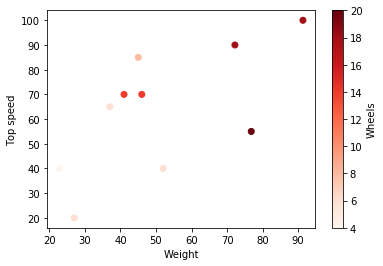

In [46]:
fig, ax = plt.subplots()

points = ax.scatter(x=trains['weight_tons'], y=trains['top_speed_mph'],
                    c=trains['wheels'], 
                    cmap='Reds')
ax.set_xlabel('Weight')
ax.set_ylabel('Top speed')

# Create a colorbar showing the colour mapping for the points
cbar = fig.colorbar(points)
cbar.set_label('Wheels')

If we want to colour points by some discrete category, and get an appropriate legend, we do this by drawing each set of points separately.

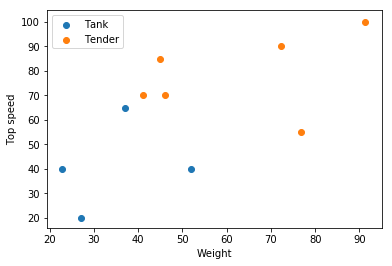

In [41]:
engine_groups = trains.groupby('engine_type')

fig, ax = plt.subplots()

for (label,df) in engine_groups:
    ax.scatter(x=df['weight_tons'], y=df['top_speed_mph'], label=label)
    ax.set_xlabel('Weight')
    ax.set_ylabel('Top speed')

ax.legend()

In [ ]:
# If you're not familiar with what groupby does, have a look at the resulting groups here
list(engine_groups)

**Exercise:** 

For these exercises, you may want to subsample your data with `sample = sales.sample(1000)` or similar.

* Colour your scatter plot of house sale locations (`long` & `lat`) by the `waterfront` variable. 
* Colour your scatter plot of house sale locations (`long` & `lat`) by `price`. Try to choose a colourmap so that higher prices are more noticeable or intense than lower.

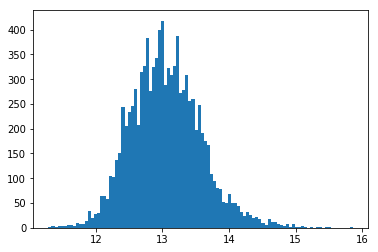

In [16]:
p = plt.hist(np.log(sales['price']), bins=100)

Text(0.5,1,'House sales in Seattle')

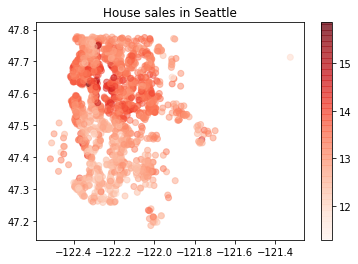

In [18]:
fig, ax = plt.subplots()

sample = sales.sample(2000)

p = ax.scatter(sample['long'], sample['lat'], alpha=0.5, 
           c=np.log(sample['price']), 
           cmap='Reds')

fig.colorbar(p)
ax.set_title("House sales in Seattle")

Text(0.5,1,'House sales in Seattle')

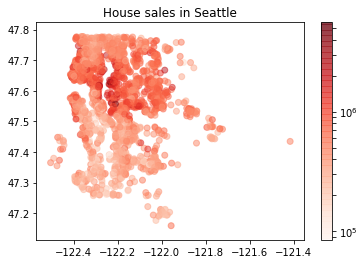

In [19]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots()

sample = sales.sample(2000)

p = ax.scatter(sample['long'], sample['lat'], alpha=0.5, 
           c=sample['price'], norm=LogNorm(),
           cmap='Reds')

fig.colorbar(p)
ax.set_title("House sales in Seattle")

Text(0.5,1,'House sales in Seattle')

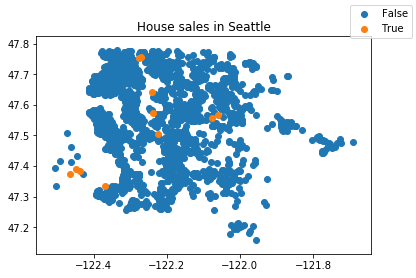

In [13]:
fig, ax = plt.subplots()

sample = sales.sample(2000)

for (label,df) in sample.groupby('waterfront'):
    ax.scatter(df['long'], df['lat'], label=label)

fig.legend()
ax.set_title("House sales in Seattle")

Text(0.5,1,'House sales in Seattle')

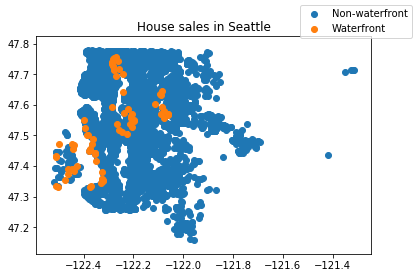

In [20]:
# Here's a version that uses boolean indexing instead of groupby

fig, ax = plt.subplots()

sample = sales.sample(2000)

nonwaterfront_sales = sales[~sales['waterfront']] # the same as sales[sales['waterfront']==False]
waterfront_sales = sales[sales['waterfront']]     # the same as sales[sales['waterfront']==True]

ax.scatter(nonwaterfront_sales['long'], nonwaterfront_sales['lat'], label="Non-waterfront")
ax.scatter(waterfront_sales['long'], waterfront_sales['lat'], label="Waterfront")

fig.legend()
ax.set_title("House sales in Seattle")